In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('forbes_billionaires_2022.csv')
df.head()

,rank,personName,age,finalWorth,category,source,country,state,city,organization,selfMade,gender,birthDate,title,philanthropyScore,bio,about
0,1,Elon Musk,50.0,219000,Automotive,"Tesla, SpaceX",United States,Texas,Austin,Tesla,True,M,6/28/1971,CEO,1.0,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000,Technology,Amazon,United States,Washington,Seattle,Amazon,True,M,1/12/1964,Entrepreneur,1.0,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000,Fashion & Retail,LVMH,France,NaN,Paris,LVMH Moët Hennessy Louis Vuitton,False,M,3/5/1949,Chairman and CEO,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000,Technology,Microsoft,United States,Washington,Medina,Bill & Melinda Gates Foundation,True,M,10/28/1955,Cofounder,4.0,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000,Finance & Investments,Berkshire Hathaway,United States,Nebraska,Omaha,Berkshire Hathaway,True,M,8/30/1930,CEO,5.0,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


In [3]:
# Not all the columns will be of use to us so we have to drop them. 
# The columns we don't need are bio and about. So we drop them.

In [4]:
df = df.drop(['bio','about'], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               2668 non-null   int64  
 1   personName         2668 non-null   object 
 2   age                2582 non-null   float64
 3   finalWorth         2668 non-null   int64  
 4   category           2668 non-null   object 
 5   source             2668 non-null   object 
 6   country            2655 non-null   object 
 7   state              748 non-null    object 
 8   city               2624 non-null   object 
 9   organization       352 non-null    object 
 10  selfMade           2668 non-null   bool   
 11  gender             2652 non-null   object 
 12  birthDate          2569 non-null   object 
 13  title              401 non-null    object 
 14  philanthropyScore  396 non-null    float64
dtypes: bool(1), float64(2), int64(2), object(10)
memory usage: 294.5+ KB


In [6]:
# We will create another column called age_group that will contain age intervals from 20-29,...,100-109.
# The creation of this column will help us in the age analysis of candidates in the dataset.
# Let's fill the missing ages with the mean age and change its datatype from float to integer.

In [7]:
# fill in the missing ages with the mean age
df.age.fillna(df.age.mean(),inplace=True)

# change the datatype of the age column from float to integer
df.age = df.age.astype(int)

In [8]:
# Now lets define the function to create the list of age intervals.

def age_interval(ages):
    # this function creates a list of age intervals
    # from 20-29 to 120-129
    intervals = [str(i)+'0-'+str(i)+'9' for i in range(2,13)]
    age_data = []
    for i in ages:
        if (i >= 20) and (i < 30):
            age_data.append(intervals[0])
        elif (i >= 30) and (i < 40):
            age_data.append(intervals[1])
        elif (i >= 40) and (i < 50):
            age_data.append(intervals[2])
        elif (i >= 50) and (i < 60):
            age_data.append(intervals[3])
        elif (i >= 60) and (i < 70):
            age_data.append(intervals[4])
        elif (i >= 70) and (i < 80):
            age_data.append(intervals[5])
        elif (i >= 80) and (i < 90):
            age_data.append(intervals[6])
        elif (i >= 90) and (i < 100):
            age_data.append(intervals[7])
        elif (i >= 100) and (i < 110):
            age_data.append(intervals[8])
        elif (i >= 110) and (i < 120):
            age_data.append(intervals[9])
        else:
            age_data.append(intervals[10])
            
    return age_data

In [9]:
# create a list of the age intervals
ages = age_interval(df.age.values)

# create a new column of age groups or age intervals
df['age_group'] = ages
df.head()

,rank,personName,age,finalWorth,category,source,country,state,city,organization,selfMade,gender,birthDate,title,philanthropyScore,age_group
0,1,Elon Musk,50,219000,Automotive,"Tesla, SpaceX",United States,Texas,Austin,Tesla,True,M,6/28/1971,CEO,1.0,50-59
1,2,Jeff Bezos,58,171000,Technology,Amazon,United States,Washington,Seattle,Amazon,True,M,1/12/1964,Entrepreneur,1.0,50-59
2,3,Bernard Arnault & family,73,158000,Fashion & Retail,LVMH,France,NaN,Paris,LVMH Moët Hennessy Louis Vuitton,False,M,3/5/1949,Chairman and CEO,NaN,70-79
3,4,Bill Gates,66,129000,Technology,Microsoft,United States,Washington,Medina,Bill & Melinda Gates Foundation,True,M,10/28/1955,Cofounder,4.0,60-69
4,5,Warren Buffett,91,118000,Finance & Investments,Berkshire Hathaway,United States,Nebraska,Omaha,Berkshire Hathaway,True,M,8/30/1930,CEO,5.0,90-99


In [10]:
# The first thing will do is to analyze the distribution of worth of the billionaires.
# A histogram will better give us the explanation we need from the distribution of worth of billionaires.

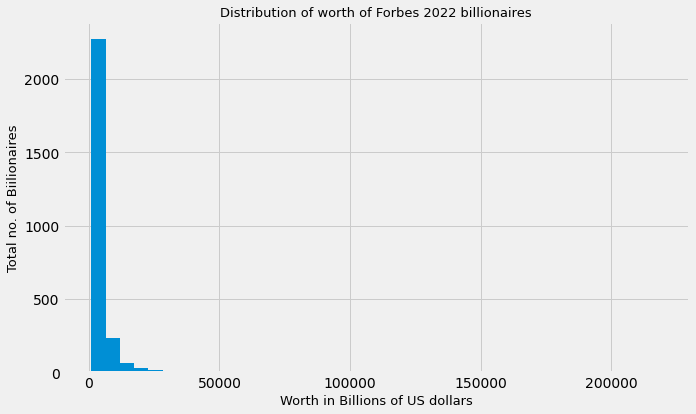

In [11]:
with plt.style.context('fivethirtyeight'):
    df.finalWorth.hist(figsize=(10,6), bins=40)
    plt.xlabel('Worth in Billions of US dollars', fontsize=13)
    plt.ylabel('Total no. of Biilionaires', fontsize=13)
    plt.title('Distribution of worth of Forbes 2022 billionaires', fontsize=13)
    plt.show()

In [12]:
# As we can see from the chart above, the distribution is highly skewed to right. 
# we can confidently conclude by looking at the chart that more than 90% of the world's richest people in 2022 have their 
# net worth btw 1 to 20 billion US dollars.
# Since the distribution is highly skewed, all averages reported in this analysis refers to the median.

# Age analysis

### 1) Who are the youngest and oldest billionaires in the world in 2022 according to Forbes?

In [13]:
# To get this info. we just need to find the details of the candidates with the minimun and maximum age respectively from the df.


# index of the youngest billionaire.
indx_y = np.argmin(df.age.values)

# index of the oldest billionaire
indx_o = np.argmax(df.age.values)

# fetching the details
youngest_bill = df.iloc[indx_y,:-1]
oldest_bill = df.iloc[indx_o,:-1]

print('The youngest billionaire:')
display(youngest_bill)

print('The oldest billionaire:')
display(oldest_bill)

The youngest billionaire:


rank                                1292
personName           Kevin David Lehmann
age                                   19
finalWorth                          2400
category                Fashion & Retail
source                        drugstores
country                              NaN
state                                NaN
city                                 NaN
organization                         NaN
selfMade                           False
gender                                 M
birthDate                       9/1/2002
title                                NaN
philanthropyScore                    NaN
Name: 1311, dtype: object

The oldest billionaire:


rank                                  1645
personName                   George Joseph
age                                    100
finalWorth                            1800
category             Finance & Investments
source                           insurance
country                      United States
state                           California
city                           Los Angeles
organization                           NaN
selfMade                              True
gender                                   M
birthDate                        9/11/1921
title                                  NaN
philanthropyScore                      NaN
Name: 1681, dtype: object

### 2) Does age influence the net worth of the world's richest people in 2022?

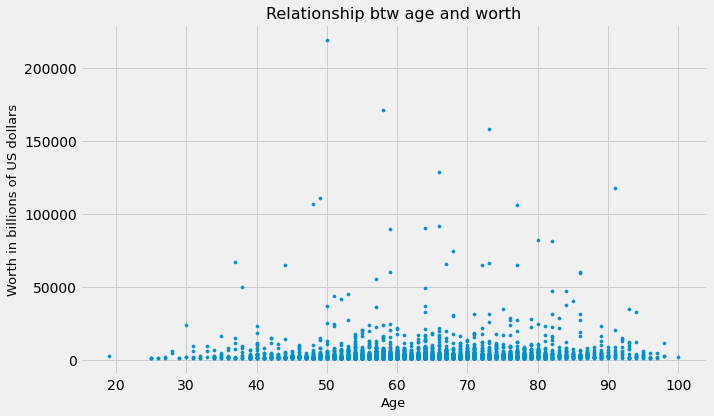

In [14]:
# This is to analyze the relationship btw age and networth of the candidates in the list of world's billionairess in 2022.

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(10,6))
    plt.scatter(df.age, df.finalWorth, s=10)
    plt.title('Relationship btw age and worth', fontsize=16)
    plt.xlabel('Age', fontsize=13)
    plt.ylabel('Worth in billions of US dollars', fontsize=13);

In [15]:
# we can clearly see that there is no significant relationship btw age and worth. Being younger or older doesnt make you rich.

### 3) In which age interval do most of the world's richest people fall ? 

In [16]:
# Let's count the no. of billionaires in each group
agegroup_count = df.age_group.value_counts()

print('Counted age groups:\n\n{}\n'.format(agegroup_count))

# Let's try to sort the age group in ascending order
# sort the age group in the main data in ascending order
sorting_age_group = df[['age_group','age']].groupby('age_group').agg({'age':'mean'})

# Merge the sorted age groups and the counted age groups to align the age_group data
agegroup_count = pd.merge(sorting_age_group, agegroup_count, left_index=True, right_index=True)

agegroup_count = agegroup_count.drop('age', axis=1) # drop the age column
agegroup_count.columns = ['count']

print('Our sorted agegroup_count')
display(agegroup_count)

Counted age groups:

60-69      744
50-59      678
70-79      562
80-89      282
40-49      243
30-39       75
90-99       71
20-29       11
120-129      1
100-109      1
Name: age_group, dtype: int64

Our sorted agegroup_count


,count
100-109,1
120-129,1
20-29,11
30-39,75
40-49,243
50-59,678
60-69,744
70-79,562
80-89,282
90-99,71


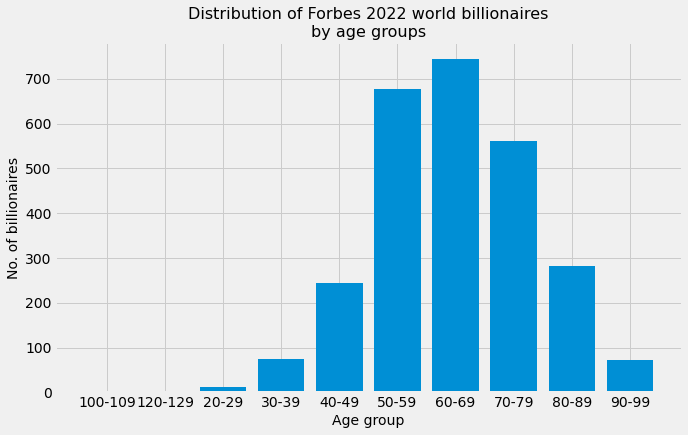

In [17]:
# visualizing the agegroup_count data
x_ticks = [i for i in range(len(agegroup_count.index))]

# I am using a fivethirtyeight style for this particular bar chart
# with plt.style.context() sets the style specified for only this plot

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(10,6))
    plt.bar(x_ticks,agegroup_count['count'].values)
    plt.xlabel('Age group', fontsize=14)
    plt.ylabel('No. of billionaires', fontsize=14)
    plt.xticks(x_ticks,agegroup_count.index)
    plt.title('Distribution of Forbes 2022 world billionaires\nby age groups', fontsize=16)
    plt.show()

In [18]:
# More than 50% of the world's richest people in 2022 fall btw ages 50 to 79
# 744 billionaires of the world's richest people are btw age 60-69, which has the highest.
# It is uncommon to get 20-29 year old billionaire as that age interval has the lowest no. of billionaires.

### 4) Which age group has the highest net worth on average?

In [19]:
df.columns

Index(['rank', 'personName', 'age', 'finalWorth', 'category', 'source',
       'country', 'state', 'city', 'organization', 'selfMade', 'gender',
       'birthDate', 'title', 'philanthropyScore', 'age_group'],
      dtype='object')

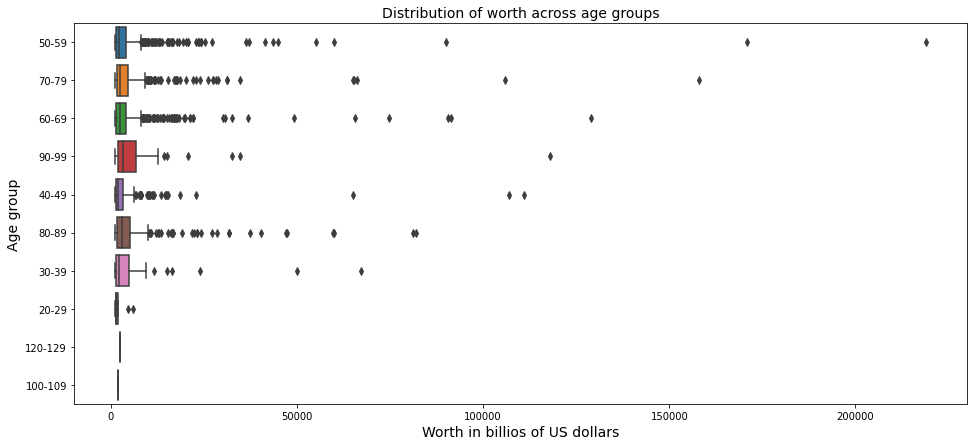

In [20]:
# Let's visualize the distribution across age groups
ageNworth = df[['age_group', 'finalWorth']]
ageNworth.head()

# since the distribution might not be a normal or may be skewed
plt.figure(figsize=(16,7))
sns.boxplot(x='finalWorth', y='age_group', data=ageNworth, orient='h')
plt.title('Distribution of worth across age groups', fontsize=14)
plt.xlabel('Worth in billios of US dollars', fontsize=14)
plt.ylabel('Age group', fontsize=14)
plt.show()

In [21]:
# The richest person in the world in 2022 fall btw the ages 50-59 years

# Analysis by Country

### 5) How many countries in total made it in the Forbes 2022 list of world's richest people and which country produced the highest no. of candidates?

In [22]:
# Let's count total no. of countries in Forbes list
print('There are a total no. of {} countries in our data'.format(len(df.country.unique())))

# Let's count the no. of billionaires in each country
nations_count = df.country.value_counts().head(20)
nations_count['other countries'] = df.country.value_counts()[21:].sum()
display(nations_count.head())

There are a total no. of 74 countries in our data


United States     748
China             571
India             159
Germany           112
United Kingdom     85
Name: country, dtype: int64

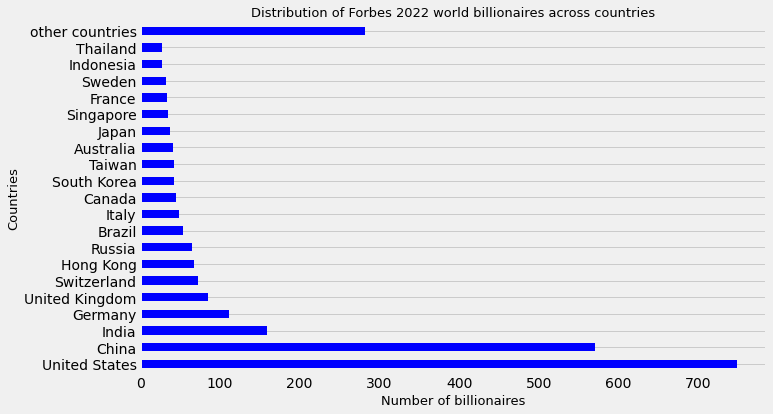

In [23]:
# Let's visualize the distribution of billionaires across countries
with plt.style.context('fivethirtyeight'):
    nations_count.plot(kind='barh', figsize=(10,6), color='b')
    plt.grid(axis='x')
    plt.xlabel('Number of billionaires', fontsize=13)
    plt.ylabel('Countries', fontsize=13)
    plt.title('Distribution of Forbes 2022 world billionaires across countries', fontsize=13)

In [24]:
# There are total no. of 74 countries whose citizens made it in the list of world's richest people in 2018.
# United states has the highest no. of candidates in the list with a count of 748 followed by China with 571 of total no. of 
# candidates.
# The sum of total of the number of candidates which are not in the top 20 is 300.

# Distribution by Country and Gender?

### 6) How many male and female billionaires were produced by the countries and which country has the highest no. of males or females or both candidates?

In [25]:
# Now we will count the number of male and female candidates produced by countries in the list of Forbes 2022.
selected_countries = list(nations_count.index[:-1])

country_genderdf = df[df.country.isin(selected_countries)][['country','gender']]

# let's make a cross tabulation of the countries and gender.
country_genderdf = pd.crosstab(country_genderdf.country, country_genderdf.gender) # pandas.crosstab() is used to perform a cross
                                                                             # tabulation on the country and gender in the data.
country_genderdf.head()

gender,F,M
country,,
Australia,9,32
Brazil,7,46
Canada,3,42
China,53,517
France,4,30


In [30]:
# a = df.groupby(['country', 'gender']).size().reset_index(name='counts').pivot(index='country', columns='gender').fillna(0)
# a

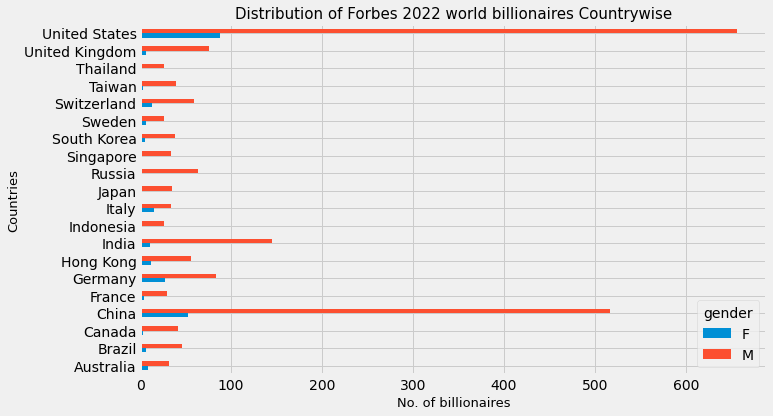

In [26]:
with plt.style.context('fivethirtyeight'):
    country_genderdf.plot(kind='barh', figsize=(10,6))
    plt.xlabel('No. of billionaires', fontsize=13)
    plt.ylabel('Countries', fontsize=13)
    plt.title('Distribution of Forbes 2022 world billionaires Countrywise',fontsize=15)

In [31]:
# From the above chart, we can clearly see that United States has the highest no. of male and female billionaires with the count
# of 658 males and 88 females. Next is china with 517 males and 53 females.

# From India 145 males and 11 females made it to the 2022 forbes list.
# From this chart we can conclude that no. of male billionaires is far greater than the female billionaires in almost all the
# countries in the list of world's richest people in 2022.

### 7) What is the average net worth of a billionaire in countries and which country has the highest net worth of a billionaire?

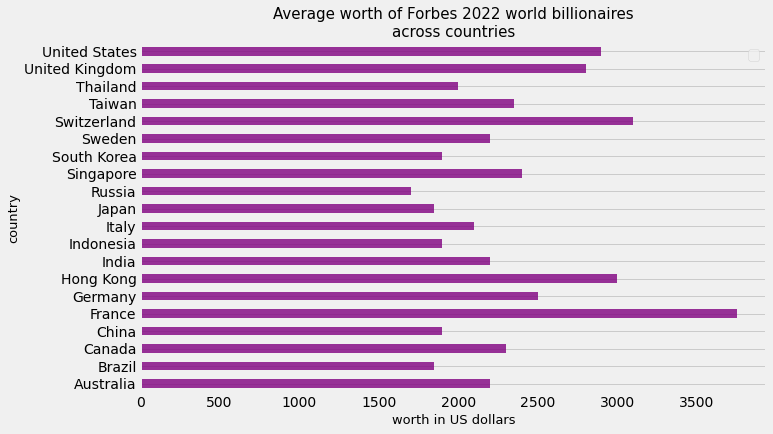

In [32]:
country_worth = df[df.country.isin(selected_countries)][['country','finalWorth']]
country_worth = country_worth.groupby('country').median()

# let's visualize the average worth in each country and compare which on has the highest or the lowest
with plt.style.context('fivethirtyeight'):
    country_worth.plot(kind='barh', figsize=(10,6), color='purple', alpha=0.8)
    plt.title('Average worth of Forbes 2022 world billionaires\nacross countries', fontsize=15)
    plt.xlabel('worth in US dollars', fontsize=13)
    plt.ylabel('country', fontsize=13)
    plt.legend(labels=[])
    plt.grid(axis='x')

In [33]:
# The average net worth of a billionaire in each country exceeds 1.5 billion US dollars. This means each billionaires found in 
# the top 20 countries with the most billionaires is expected to have a net worth greater than US $1.5 billion.

# The avg. net worth of a billionaire in France is 3.6 billion US dollars which is highest, followed by switzerland with 3.1
# billion US dollars whereas Russia has the least of all with net worth of 1.6 billion dollars.

# Hong Kong has the 3rd highest average net worth of a billionaire (US $3.0 billion) but has 2nd highest no. of billioniares
# followed by United States which has the highest no. of billionaires in world's richest people in 2022.

# This means that, being the country with the highest no. of billionaires doesn't mean your candidates are expected to be 
# wealthiest or have the highest net worth.

### 8) What is the difference in the net worth of male and female billioniares across countries?

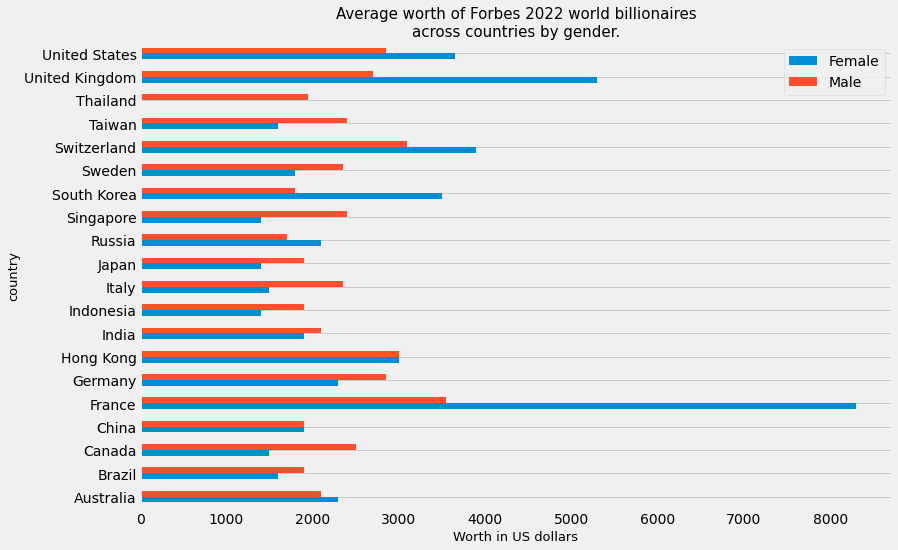

In [34]:
country_genderworth = df[df.country.isin(selected_countries)][['country','gender','finalWorth']]
country_genderworth = country_genderworth.groupby(['country','gender']).median()
country_genderworth = country_genderworth.unstack('gender')

# Now we visualize and compare and make conclusions.
with plt.style.context('fivethirtyeight'):
    country_genderworth.plot(kind='barh', figsize=(12,8))
    plt.legend(labels=['Female','Male'])
    plt.title('Average worth of Forbes 2022 world billionaires\nacross countries by gender.', fontsize=15)
    plt.xlabel('Worth in US dollars', fontsize=13)
    plt.ylabel('country', fontsize=13)
    plt.grid(axis='x')

In [35]:
# Looking at the chart above, 7 out of the top 20 countries with the most no. of candidates, have the average net worth of 
# female billionaire greater than the average net worth of male billioniare. This means that in these 7 countries, the female
# billionaires are expected to be wealthier than the males.

# Among these 20 countries, female billionaires in France are the wealthiest, i.e., have the highest average net worth of 8.3
# billion US dollars. Followed by United Kingdom with net worth of 5.3 billion US dollars.

# Analysis by Industry/Business activity

### 9) What are the types of industries the world's richest people in 2022 engage in and which industry has the highest no. of  billionaires?


In [36]:
# Let's count the total no. of industries in the world richest people engage in.
print('There are a total no. of {} industries in our data'.format(len(df.category.unique())))

# Let's count the no. of billionaires across industries.
industry_count = df.category.value_counts()
industry_count

There are a total no. of 18 industries in our data


Finance & Investments         392
Technology                    343
Manufacturing                 337
Fashion & Retail              250
Healthcare                    217
Food & Beverage               203
Real Estate                   193
Diversified                   180
Media & Entertainment          99
Energy                         95
Automotive                     70
Metals & Mining                68
Service                        53
Construction & Engineering     46
Telecom                        37
Logistics                      35
Sports                         27
Gambling & Casinos             23
Name: category, dtype: int64

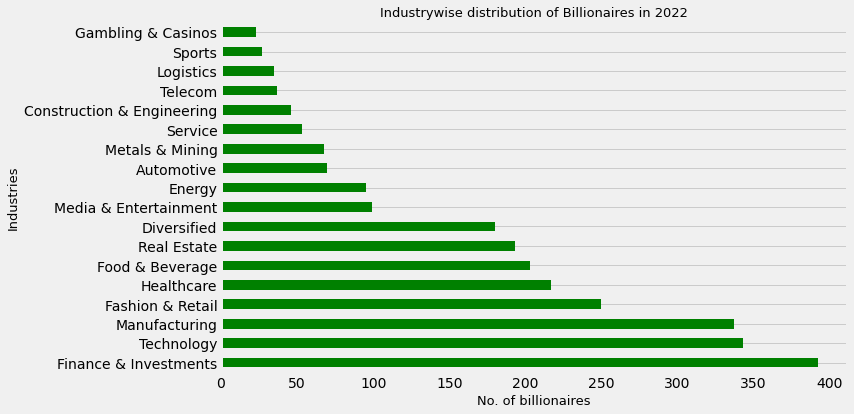

In [37]:
# Let's visualize the distribution of billionaires across industries.

with plt.style.context('fivethirtyeight'):
    industry_count.plot(kind='barh', figsize=(10,6), color='g')
    plt.grid(axis='x')
    plt.xlabel('No. of billionaires', fontsize=13)
    plt.ylabel('Industries', fontsize=13)
    plt.title('Industrywise distribution of Billionaires in 2022', fontsize=13)
    plt.show()

In [38]:
# 392 billionaires have been engaged in Finance & Investments industry according Forbes 2022. Followed by Technology and Manufacturing
# with the no. of 343 & 337 respectively.
# Telecom, Logistics, Sports and Gambling & Casinos industries have less than 50 billionaires engaged in.

# Other industries like healthcare, Food & Beverage and Real Estate also have seen more than 200 billionaires engaged in.

In [40]:
a = df.groupby(['category', 'gender']).size().reset_index(name='counts').pivot(index='category', columns='gender').fillna(0)
a

# The below table shows accurate gender distribution in numbers across various industries.

counts     
gender                          F    M
category                              
Automotive                      4   65
Construction & Engineering      6   40
Diversified                    28  151
Energy                          9   86
Fashion & Retail               32  214
Finance & Investments          27  362
Food & Beverage                39  162
Gambling & Casinos              4   19
Healthcare                     34  183
Logistics                       3   31
Manufacturing                  43  293
Media & Entertainment          10   88
Metals & Mining                 9   59
Real Estate                    21  171
Service                         8   45
Sports                          3   24
Technology                     30  312
Telecom                         1   36

### 10) How many male and female billionaires are found in an industry and which industry has the highest no. of males or females or both?


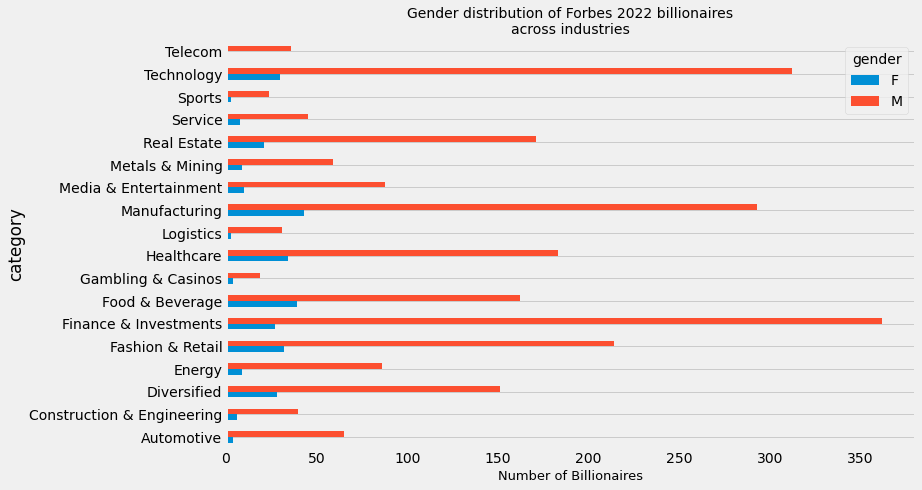

In [41]:
# Let's make a cross tabulation of the countries and gender.
industry_genderdf = pd.crosstab(df.category, df.gender)

# Visualizing the no. of billionaires across industries by gender.
with plt.style.context('fivethirtyeight'):
    industry_genderdf.plot(kind='barh', figsize=(11,7))
    plt.title('Gender distribution of Forbes 2022 billionaires\nacross industries', fontsize=14)
    plt.xlabel('Number of Billionaires', fontsize=13)
    plt.grid(axis='x');

In [42]:
# We can clearly observe from the above chart that there are more males than females across industries.
# The Finance & Investments industry has the highest male billionaires involved which is 362.

# There are 43 female billionaires in Manufacturing industry it is highest in number.
# Only 1 female billionaire is seen in Telecom industry.

### 11) What is the average net worth of the world's richest people in 2022 across industries?

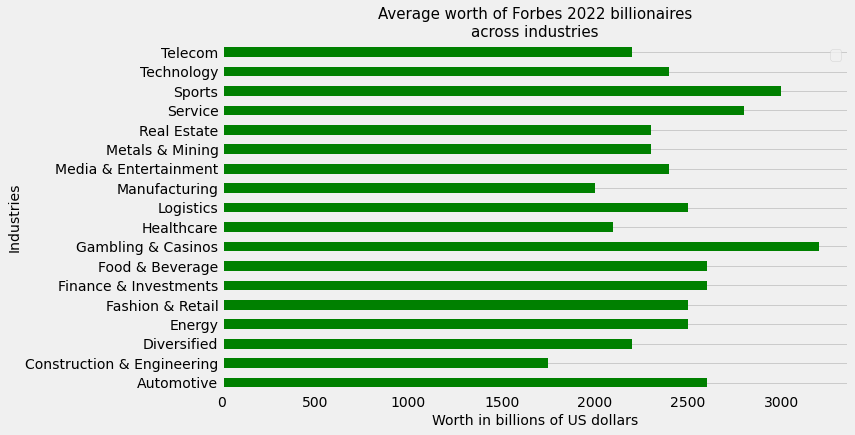

In [45]:
industry_data = df[df.category!='philanthropy/NGO']
industry_worth = industry_data[['category','finalWorth']].groupby('category').median()

# Let's visualize the average worth in each industry and compare which has the highest or lowest.
with plt.style.context('fivethirtyeight'):
    industry_worth.plot(kind='barh', figsize=(10,6), color='g')
    plt.title('Average worth of Forbes 2022 billionaires\nacross industries', fontsize=15)
    plt.xlabel('Worth in billions of US dollars', fontsize=14)
    plt.ylabel('Industries', fontsize=14)
    plt.legend(labels=[])
    plt.grid(axis='x')
    plt.show()

In [46]:
# The average net worth of a billionaire in each industry exceeds 1.5 billion US dollars. 

# The Gambling & Casinos industry has the highest average net worth of a billionaire with 3.25 billion US dollars.
# This implies billionaires who are engaged in gambling are expected to have the highest net worth as compared to other industries
# Billionaires in the Construction & Engineering industry have the least average net worth of $1.8 billion.

### 12) What are the difference in net worth of male and female billionaires across industries?

In [52]:
print(df.columns.tolist())

['rank', 'personName', 'age', 'finalWorth', 'category', 'source', 'country', 'state', 'city', 'organization', 'selfMade', 'gender', 'birthDate', 'title', 'philanthropyScore', 'age_group']


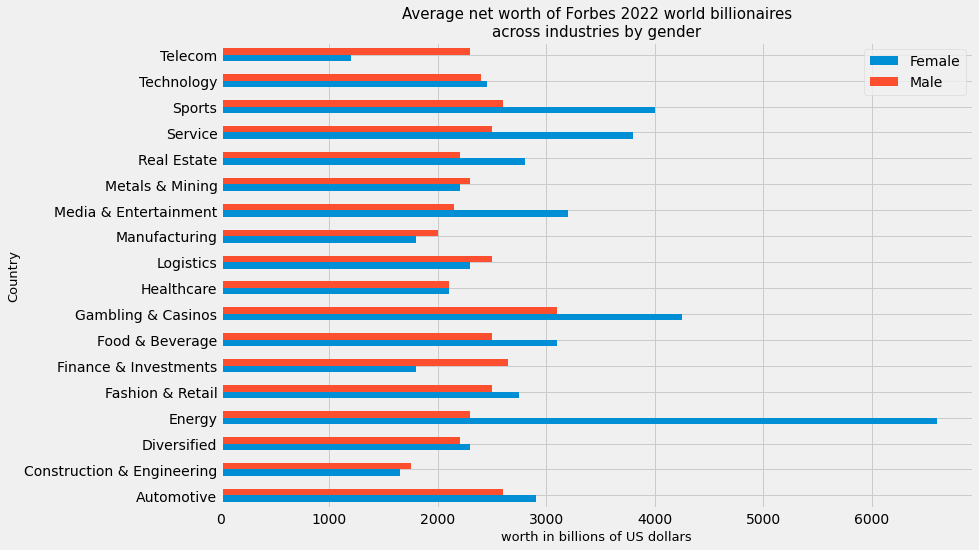

In [61]:
# get the industry, gender and worth columns from the data excluding the records where the industry value is not 
# philantropy/NGO.
industry_genderdata = df[df.category!='Philantropy/NGO'][['category','gender','finalWorth']]
industry_genderworth = industry_genderdata.groupby(['category','gender']).median()
industry_genderworth = industry_genderworth.unstack('gender')

# Now visualizing and comparing and making concluding
with plt.style.context('fivethirtyeight'):
    industry_genderworth.plot(kind='barh', figsize=(12,8))
    plt.legend(labels=['Female','Male'])
    plt.title('Average net worth of Forbes 2022 world billionaires\nacross industries by gender', fontsize=15)
    plt.xlabel('worth in billions of US dollars', fontsize=13)
    plt.ylabel('Country', fontsize=13)
    plt.show()

In [60]:
# industry_genderworth = industry_genderdata.groupby(['category','gender']).value_counts()
# industry_genderworth

In [62]:
# Similar to the observation from the net worth difference in gender across countries, the avg. net worth of female billionaires
# in most industries are greater than the male billionaires. i.e., females are wealthier than males.

# Among the list of Forbes 2022 world's richest people, the females in the Energy sector are the wealthiest with avg. net worth
# of 6.6 billion US dollars and it is the highest.

# Female billionaires in the Gambling & Casinos industry have the second highest average net worth of $4.3 billion.
# Among the male billionaires in the Forbes 2022 list, those are in the Gambling & Casinos industry have the highest net worth
# of $3.1 billion. 

In [65]:
state_res = df['state'].value_counts()
state_res = state_res[state_res>=1]       # state wise billionaires. (only USA)
state_res = state_res.reset_index()
state_res

,index,state
0,California,186
1,New York,135
2,Florida,78
3,Texas,67
4,Illinois,25
5,Massachusetts,24
6,Georgia,18
7,Pennsylvania,17
8,Washington,16
9,Nevada,16


In [69]:
# df[df['age'] == df['age'].max()]  # eldest forbes billionaire.

In [68]:
# df[df['age'] == df['age'].min()]  # youngest forbes billionaire in 2022.